In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import r2_score

In [3]:
#https://www.kaggle.com/datasets/jayashankara/admission-predict-ver1
data = pd.read_csv("D:\DataSets\Predictive Analysis_MLDL/Admission_Predict_Ver1.1.csv")

# Data Understanding

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

In [6]:
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
115,116,310,106,4,4.5,4.5,9.04,1,0.66
380,381,322,104,3,3.5,4.0,8.84,1,0.78
67,68,316,107,2,3.5,3.5,8.64,1,0.57
442,443,331,116,4,4.5,4.5,9.44,1,0.92
378,379,303,98,1,2.0,2.5,7.65,0,0.56


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 500 entries, 0 to 499

Data columns (total 9 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Serial No.         500 non-null    int64  

 1   GRE Score          500 non-null    int64  

 2   TOEFL Score        500 non-null    int64  

 3   University Rating  500 non-null    int64  

 4   SOP                500 non-null    float64

 5   LOR                500 non-null    float64

 6   CGPA               500 non-null    float64

 7   Research           500 non-null    int64  

 8   Chance of Admit    500 non-null    float64

dtypes: float64(4), int64(5)

memory usage: 35.3 KB


In [9]:
data.isnull().mean()*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [10]:
data.duplicated().sum()

0

In [23]:
data.drop(columns="Serial No.", inplace=True)

In [24]:
data["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [25]:
data["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [26]:
data["SOP"].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

# Exploratory Data Analysis

In [27]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 500 entries, 0 to 499

Data columns (total 8 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   GRE Score          500 non-null    int64  

 1   TOEFL Score        500 non-null    int64  

 2   University Rating  500 non-null    int64  

 3   SOP                500 non-null    float64

 4   LOR                500 non-null    float64

 5   CGPA               500 non-null    float64

 6   Research           500 non-null    int64  

 7   Chance of Admit    500 non-null    float64

dtypes: float64(4), int64(4)

memory usage: 31.4 KB


Univariant Analysis

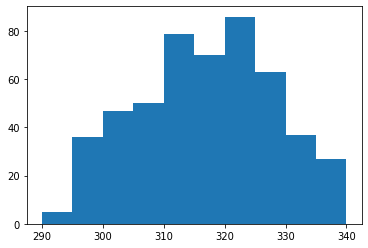

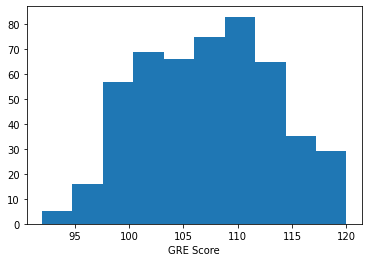

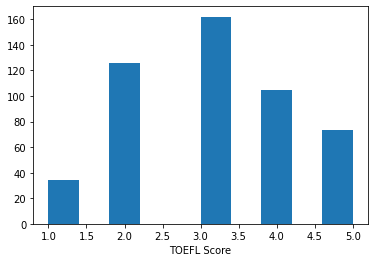

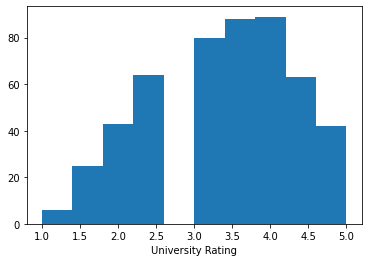

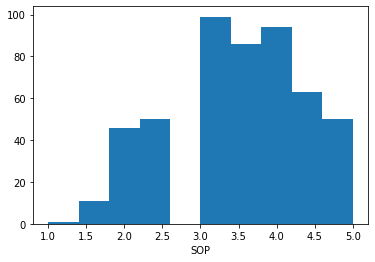

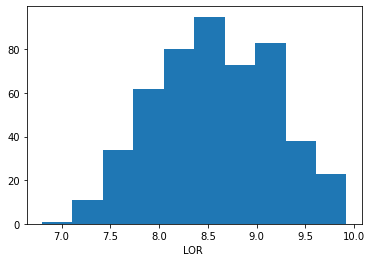

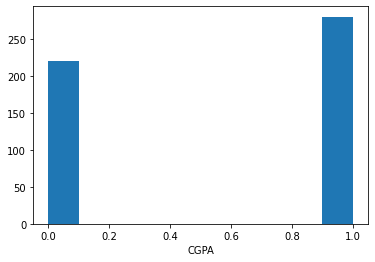

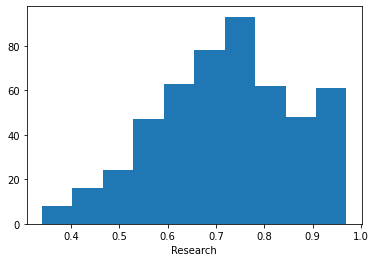

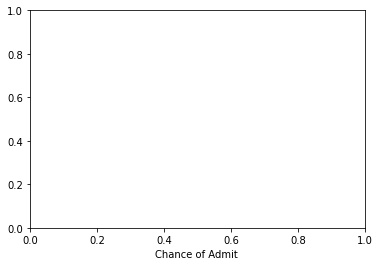

In [29]:
# Histogram
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


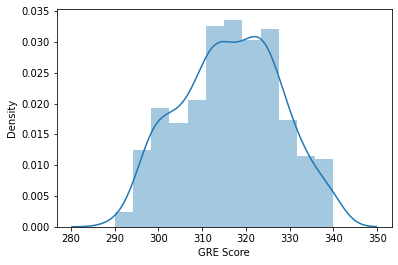

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


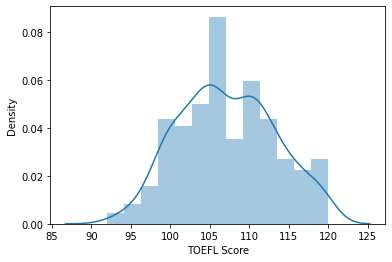

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


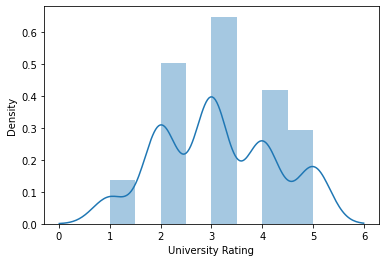

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


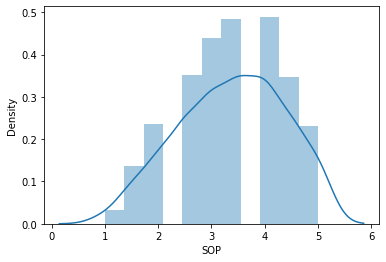

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


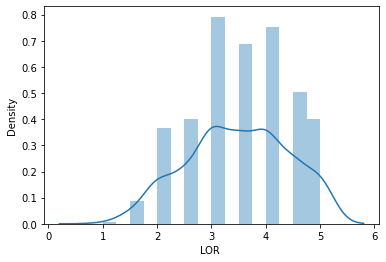

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


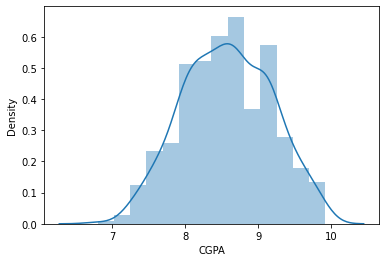

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


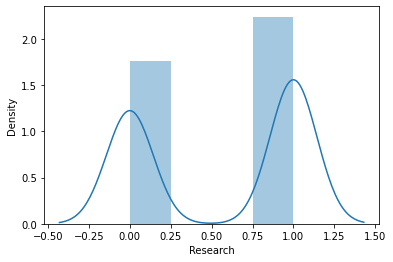

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


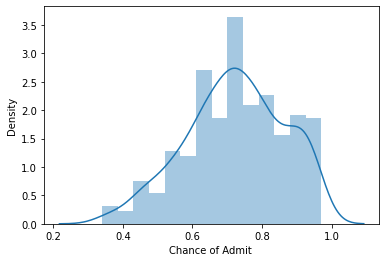

In [30]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


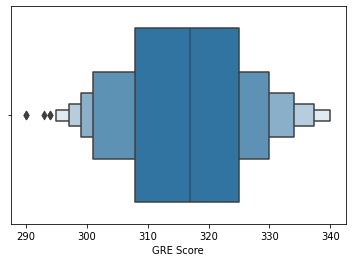

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


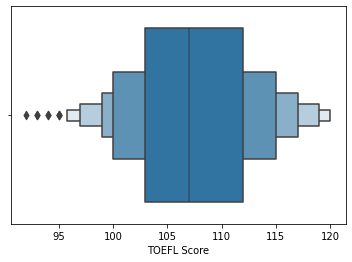

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


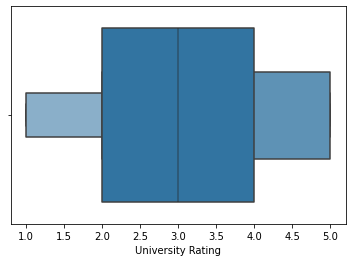

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


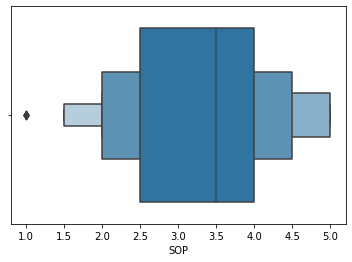

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


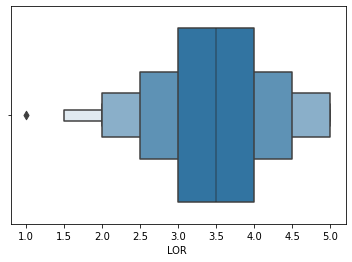

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


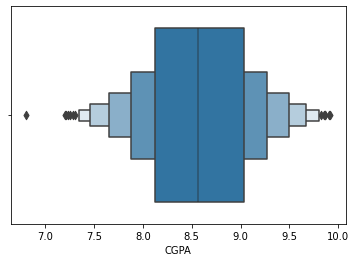

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


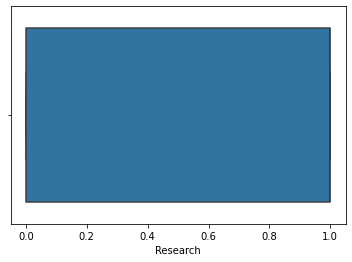

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


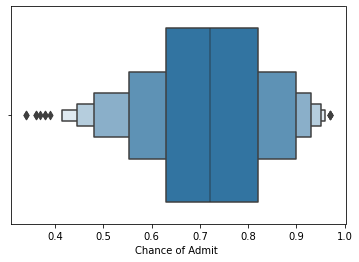

In [31]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

Multivariant Analysis

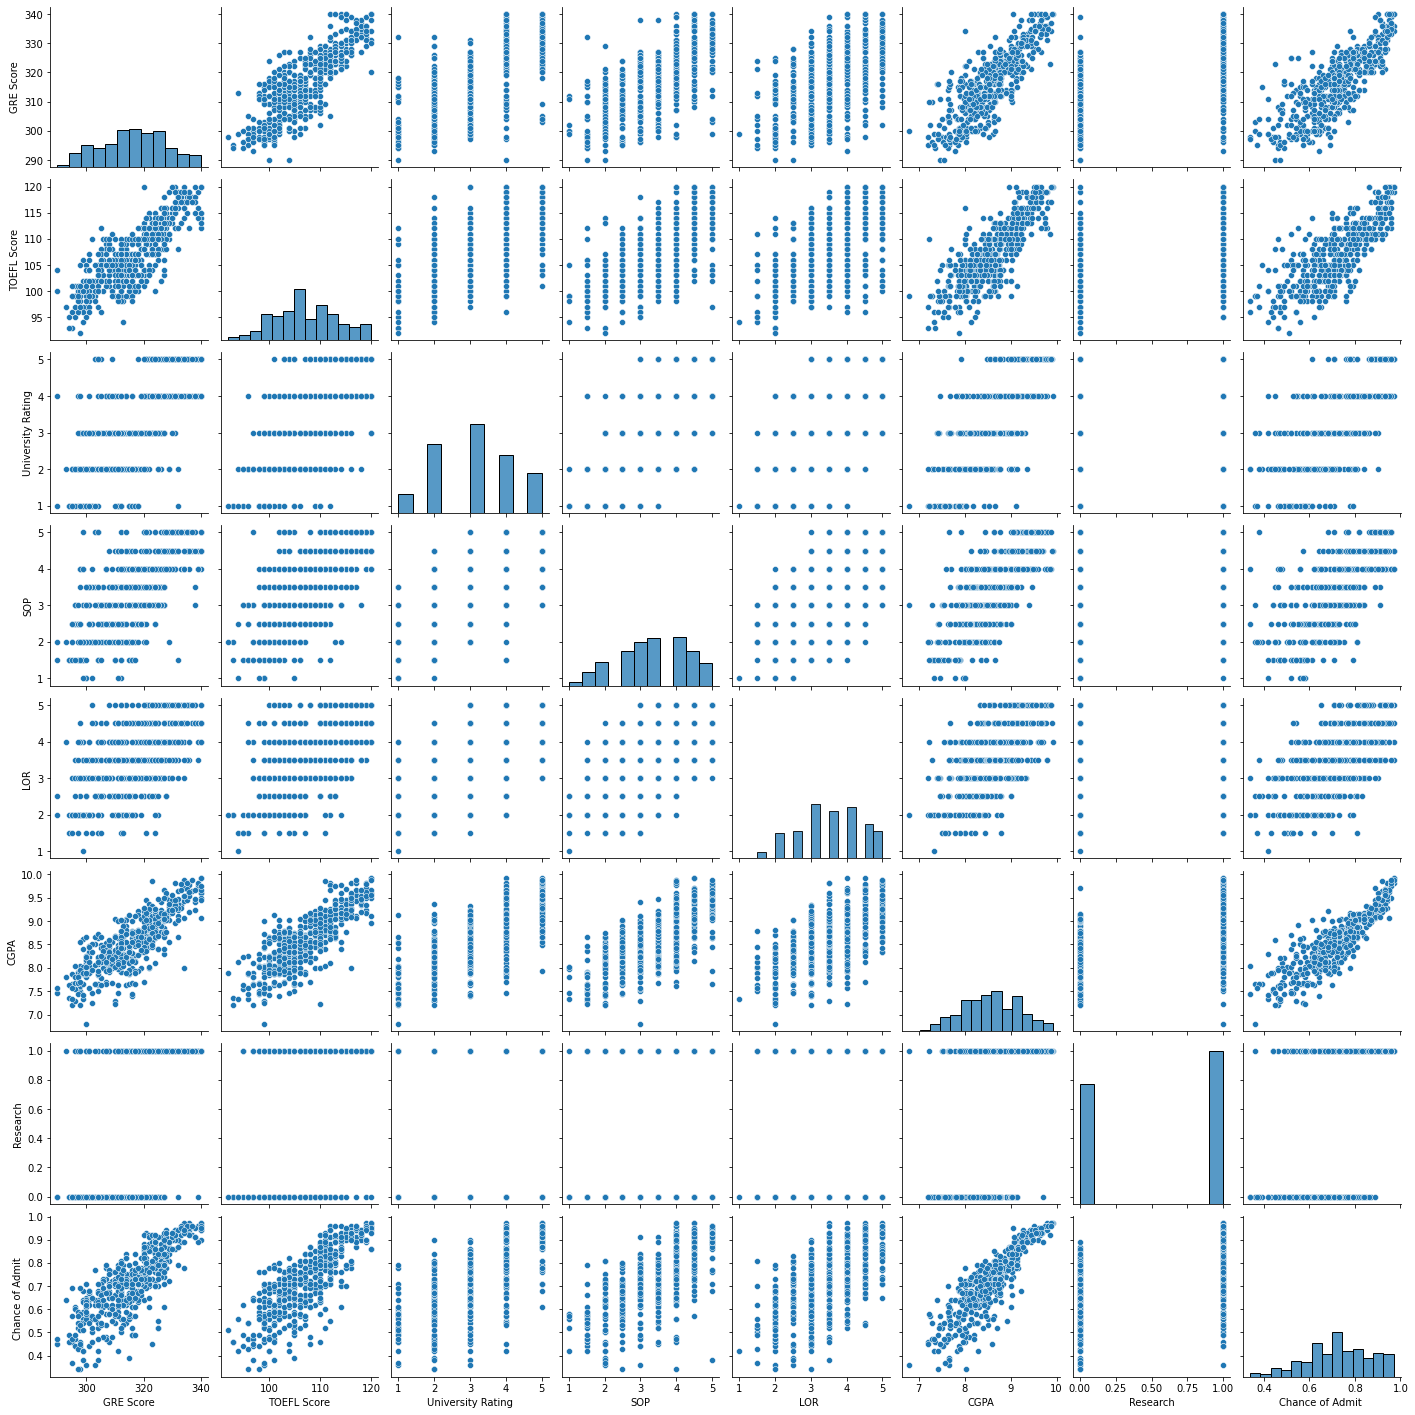

In [32]:
#sns.pairplot(train, hue ="species")
sns.pairplot(data)

In [33]:
data.shape

(500, 8)

# Feature Transformation

1. Outlier Detection

In [34]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


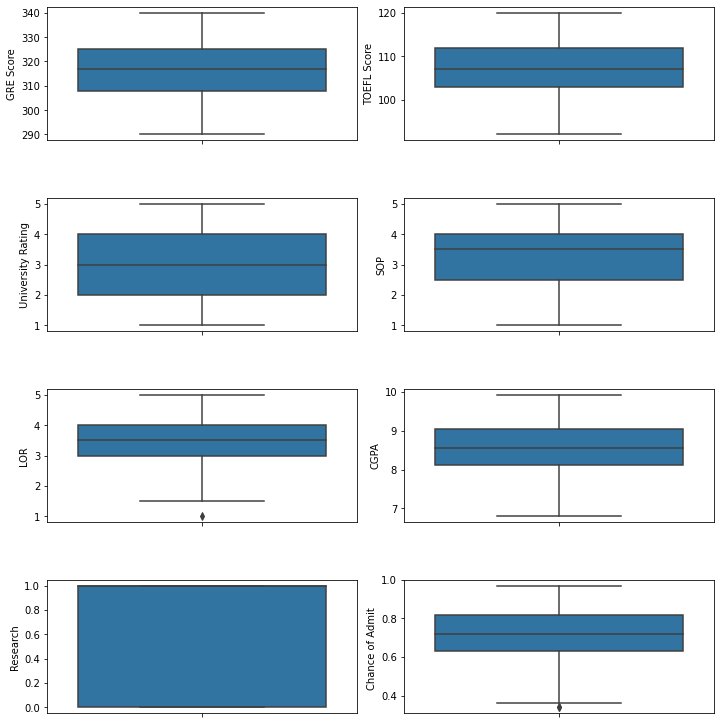

In [43]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data.columns:
    sns.boxplot(y=col, data=data, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

2. Handling Categorical Features 
                or
3. Feature Scaling - Normalization

In [44]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [46]:
mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

# Model Building

**Sequential**

In [48]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear"))

In [49]:
model.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense (Dense)                (None, 7)                 56        

_________________________________________________________________

dense_1 (Dense)              (None, 7)                 56        

_________________________________________________________________

dense_2 (Dense)              (None, 7)                 56        

_________________________________________________________________

dense_3 (Dense)              (None, 1)                 8         


Total params: 176

Trainable params: 176

Non-trainable params: 0

_________________________________________________________________


In [50]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [52]:
history = model.fit(x_train,y_train, epochs=100, validation_split=0.2)

Epoch 1/100

10/10 [==============================] - 3s 31ms/step - loss: 0.4772 - val_loss: 0.4181

Epoch 2/100

10/10 [==============================] - 0s 6ms/step - loss: 0.3837 - val_loss: 0.3338

Epoch 3/100

10/10 [==============================] - 0s 6ms/step - loss: 0.3068 - val_loss: 0.2641

Epoch 4/100

10/10 [==============================] - 0s 6ms/step - loss: 0.2403 - val_loss: 0.2039

Epoch 5/100

10/10 [==============================] - 0s 6ms/step - loss: 0.1818 - val_loss: 0.1482

Epoch 6/100

10/10 [==============================] - 0s 6ms/step - loss: 0.1284 - val_loss: 0.0990

Epoch 7/100

10/10 [==============================] - 0s 6ms/step - loss: 0.0829 - val_loss: 0.0602

Epoch 8/100

10/10 [==============================] - 0s 6ms/step - loss: 0.0496 - val_loss: 0.0341

Epoch 9/100

10/10 [==============================] - 0s 7ms/step - loss: 0.0289 - val_loss: 0.0202

Epoch 10/100

10/10 [==============================] - 0s 7ms/step - loss: 0.0188 - val_lo

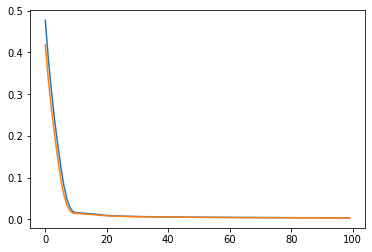

In [53]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [56]:
predicted = model.predict(x_test)

In [57]:
r2_score(y_test,predicted)*100

75.16789674026408

**Linear Regression**

In [59]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)*100

79.27524897595929

In [61]:
score = []
for i in range(5000):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    mms = MinMaxScaler()
    x_train = mms.fit_transform(x_train)
    x_test = mms.transform(x_test)

    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  2079

91.71322759570218


In [62]:
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2079)
    
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

model1 = lr.fit(x_train,y_train)
pred = model1.predict(x_test)
r2_score(y_test, pred)*100

91.71322759570218

**Decision Tree Regressor**

In [63]:
dtr = DecisionTreeRegressor()
model = dtr.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)*100

61.81402631802828

In [64]:
score = []
for i in range(5000):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    mms = MinMaxScaler()
    x_train = mms.fit_transform(x_train)
    x_test = mms.transform(x_test)
    
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  2640

80.95601142959651


In [73]:
dtr = DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2640)
    
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

model2 = dtr.fit(x_train,y_train)
pred = model2.predict(x_test)
r2_score(y_test, pred)*100

80.57160795971453

**Random Forest Regressor**

In [74]:
rfr = RandomForestRegressor()
model = rfr.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)*100

85.358489070128

In [76]:
score = []
for i in range(500):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    mms = MinMaxScaler()
    x_train = mms.fit_transform(x_train)
    x_test = mms.transform(x_test)
    
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  131

88.2900502466342


In [77]:
rfr = RandomForestRegressor()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=131)
    
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

model3 = rfr.fit(x_train,y_train)
pred = model3.predict(x_test)
r2_score(y_test, pred)*100

88.64561898120617